In [1]:
!pip install -i https://test.pypi.org/simple/ nayzakflow==1.0.0
!pip install matrices

Looking in indexes: https://test.pypi.org/simple/


In [1]:
import nayzakflow as nf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data_reader= nf.data.CSVReader(
    path= "/content/drive/MyDrive/MNIST/mnist_train.csv",
    label_col_name='label',
    mode="classification"
)

test_data_reader =  nf.data.CSVReader(
    path= "/content/drive/MyDrive/MNIST/mnist_test.csv",
    label_col_name='label',
    mode="classification",
    split=0.2
)


(x_train,y_train)= train_data_reader.read_data()
(x_valid,y_valid),(x_test,y_test)= test_data_reader.read_data()

Labels are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Labels are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(8000, 784)
(8000, 1)
(2000, 784)
(2000, 1)


In [5]:
#Normalizing
x_train = x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0

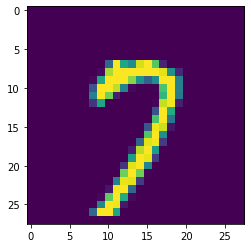

In [6]:
#testing if the images were loaded correctly
plt.imshow(x_train[0].reshape(28,28))

In [8]:
#creating the model
model = nf.nn.layers.Sequential(
    [
        nf.nn.layers.Linear(1024,784,activation='relu'),
        nf.nn.layers.Linear(512,1024,activation='relu'),
        nf.nn.layers.Linear(256,512,activation='relu'),
        nf.nn.layers.Linear(64,256,activation='relu'),
        nf.nn.layers.Linear(10,64,activation='softmax')
    ]
)


#compiling
model.compile(
    loss= nf.nn.loss.SoftmaxLogLikelihood,
    optimizer=nf.optimizer.Adam(lr=0.05),
    metrics= ['accuracy', 'precision','recall']
)

Epoch 1/5
loss: 0.0757496544825494.... accuracy: 0.9954433333333333    precision: 0.9772166666666666    recall: 0.9772166666666666    val_loss: 0.09362506886439144.... val_accuracy: 1.0    val_precision: 1.0    val_recall: 1.0    

/usr/local/lib/python3.6/dist-packages/nayzakflow/visualize.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(Visualize.rows, Visualize.columns, self.number)


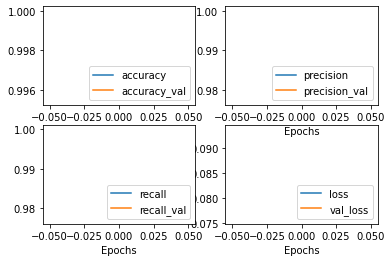


Epoch 2/5
loss: 0.048033771124400104.... accuracy: 0.9971833333333333    precision: 0.9859166666666667    recall: 0.9859166666666667    val_loss: 0.08594458901407924.... val_accuracy: 1.0    val_precision: 1.0    val_recall: 1.0    

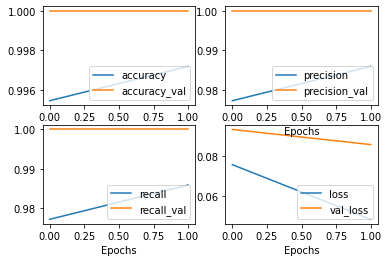


Epoch 3/5
loss: 0.03855068093413061.... accuracy: 0.99756    precision: 0.9878    recall: 0.9878    val_loss: 0.073935658487089.... val_accuracy: 1.0    val_precision: 1.0    val_recall: 1.0    

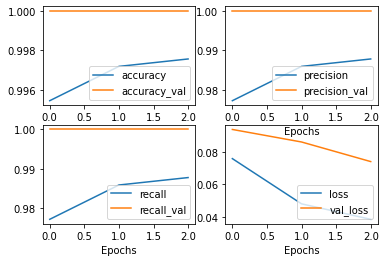


Epoch 4/5
loss: 0.030910671210294415.... accuracy: 0.9981    precision: 0.9905    recall: 0.9905    val_loss: 0.08530022282670684.... val_accuracy: 1.0    val_precision: 1.0    val_recall: 1.0    

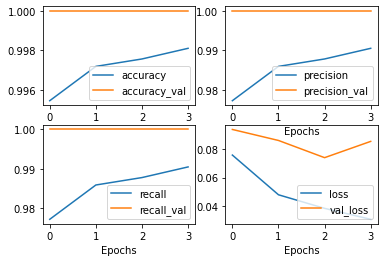


Epoch 5/5
loss: 0.03243147295370683.... accuracy: 0.9981833333333333    precision: 0.9909166666666667    recall: 0.9909166666666667    val_loss: 0.07880255002772336.... val_accuracy: 1.0    val_precision: 1.0    val_recall: 1.0    

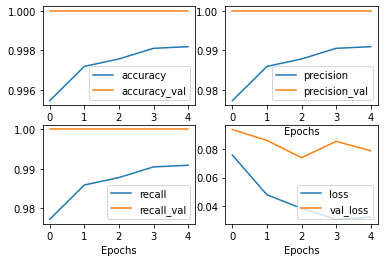

In [9]:
model.fit((x_train,y_train),(x_valid,y_valid) , batch_size=64, epochs=5,plot=True)

[[191   0   0   0   0   0   2   0   1   1]
 [  1 226   1   0   0   0   0   0   0   0]
 [  1   0 193   0   0   0   0   4   1   0]
 [  0   0   3 193   0   4   0   2   2   1]
 [  0   0   0   0 207   0   0   0   0   3]
 [  0   0   0   0   0 174   1   0   1   0]
 [  1   0   0   0   0   1 193   0   0   0]
 [  0   0   0   2   3   0   0 193   1   1]
 [  1   0   0   1   0   5   1   0 179   1]
 [  0   0   0   1   0   0   0   0   0 203]]


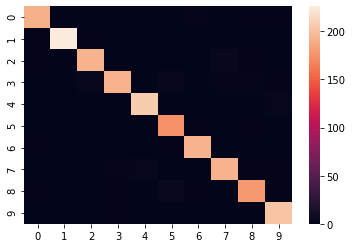

(0.09144204404506312, [0.9952, 0.976, 0.976])

In [10]:
model.evaluate(x_test,y_test,True)

In [11]:
#test prediction
i=1
np.argmax(model.predict(np.expand_dims(x_valid[i],axis=0)))

4

In [12]:
y_valid[i]

array([4])

In [13]:
#to save the entire model
model.save_model('/content/drive/MyDrive/MNIST/mnist_model')

In [14]:
#to load it
new_model = nf.nn.layers.Sequential()
new_model.load_model('/content/drive/MyDrive/MNIST/mnist_model')
new_model.summary()

      No.      W_Shape Activation  Name
0  Layer1  (1024, 784)       relu  None
1  Layer2  (512, 1024)       relu  None
2  Layer3   (256, 512)       relu  None
3  Layer4    (64, 256)       relu  None
4  Layer5     (10, 64)    softmax  None


In [15]:
new_model.evaluate(x_test,y_test)

(0.09144204404506312, [0.9952, 0.976, 0.976])

In [16]:
#to save the model weights
model.save_weights('/content/drive/MyDrive/MNIST/mnist_weights')

In [17]:
#to load the saved weigths

#first we must create the model with the same architecture as the previous

#creating the model
my_model = nf.nn.layers.Sequential(
    [
        nf.nn.layers.Linear(1024,784,activation='relu'),
        nf.nn.layers.Linear(512,1024,activation='relu'),
        nf.nn.layers.Linear(256,512,activation='relu'),
        nf.nn.layers.Linear(64,256,activation='relu'),
        nf.nn.layers.Linear(10,64,activation='softmax')
    ]
)


#compiling
my_model.compile(
    loss= nf.nn.loss.SoftmaxLogLikelihood,
    optimizer=nf.optimizer.Adam(lr=0.05),
    metrics= ['accuracy', 'precision','recall']
)


#load the weights
my_model.load_weights('/content/drive/MyDrive/MNIST/mnist_weights')